# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from sklearn.tree import DecisionTreeRegressor


# Business Understanding (CRISP-DM Phase-1)

In this notebook I would like to analyse the pricing of Boston AirBnB listings. 
* I would like to see how the number of available places does influence the average price
* I would like to see if there is any seasonal pattern in the prices
* I would like to train a model from which I can see the most influencing amenity factor of the prices


# Data Understanding (CRISP-DM Phase-2)

In [2]:
# Reading the listings
df_l = pd.read_csv('./listings.csv')

In [3]:
df_l.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
df_l.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [6]:
df_l.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [7]:
# Reading the calendar
df_c = pd.read_csv('./calendar.csv')

In [8]:
df_c.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [9]:
df_c.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [10]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [11]:
df_c.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


# Data Preparation (CRISP-DM Phase-3)


In [12]:
#Checking if there is empty date (in calendar)
df_c.date.isnull().sum()

0

In [13]:
#Checking if there are NaN prices

print( df_c['price'].size )
print( df_c['price'].isna().sum())

1308890
665853


In [14]:
#Deleting the lines which have no prices
df_c = df_c.dropna(subset=['price'])

In [15]:
print( df_c['price'].size )
print( df_c['price'].isna().sum())

643037
0


In [16]:
#Converting the price to a number (currently it contains the $ sign, and it may contain "," to separate thousands)
def conv_price(s):
    """Deleting the $ sign, and deleting the comma (thousand-separator)"""
    return float(s[1:].replace(',',''))

df_c['price'] = df_c['price'].apply(conv_price)

df_c['price']


365        65.0
366        65.0
367        65.0
368        75.0
369        75.0
           ... 
1308875    62.0
1308876    62.0
1308877    62.0
1308878    62.0
1308879    62.0
Name: price, Length: 643037, dtype: float64

In [17]:
#Converting the price to a number (currently it contains the $ sign, and it may contain "," to separate thousands)
df_l['price'] = df_l['price'].apply(conv_price)
df_l['price']

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

In [18]:
# Some of the used columns has empty values:
df_l['property_type'].isnull().sum()

3

In [19]:
# Deleting those rows which has null values
df_l = df_l.dropna(subset=['amenities', 'price', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bedrooms'])
df_l.shape

(3572, 95)

In [20]:
#Splitting and turning the amenity-values to one-hot-encoded form
amenities = df_l['amenities'].str.replace("[{}]", "").replace('"', '')
X=amenities.str.get_dummies(sep = ",")
nr_of_amenities = X.shape[1]
nr_of_amenities

45

In [21]:
df_daily_prices = df_c.groupby('date')['price'].mean()
df_daily_prices[250:270]

date
2017-05-14    193.729215
2017-05-15    192.329296
2017-05-16    190.883467
2017-05-17    189.759494
2017-05-18    193.157034
2017-05-19    197.539003
2017-05-20    198.534911
2017-05-21    194.427643
2017-05-22    191.024103
2017-05-23    190.737858
2017-05-24    191.003521
2017-05-25    194.203052
2017-05-26    199.292627
2017-05-27    199.369390
2017-05-28    194.187858
2017-05-29    190.034305
2017-05-30    190.423429
2017-05-31    192.150771
2017-06-01    192.394061
2017-06-02    196.155505
Name: price, dtype: float64

In [22]:
df_daily_supply = df_c.groupby('date')['price'].count()
df_daily_supply


date
2016-09-06     570
2016-09-07     932
2016-09-08     999
2016-09-09     981
2016-09-10     956
              ... 
2017-09-01    1795
2017-09-02    1798
2017-09-03    1802
2017-09-04    1801
2017-09-05    1801
Name: price, Length: 365, dtype: int64

# Question - 1

**Question**: How the number of available places does influence the average price

**Answer**: We can see that there is a strong negative correlation (-0.84) between the number of available listings and the price. Also, this can be seen well on the figure below. 

It is interesting that there are two dates (around 2016.12.05. and 2017.03.05.) where the number of listing decreased significantly, but seemingly the prices did not change. I would suspect here some kind of external effect (e.g. AirBnB introduced new rules and deleted some listing). Nevertheless it would deserve further investigation.

Also, there is a peak around 2017.04.15., but here the dependence between the two time series can be seen well. Maybe there were some bigger event in the city.


In [23]:
print('Correlation Coefficient: ')
print(np.corrcoef(df_daily_prices.values,df_daily_supply.values)[0,1])

Correlation Coefficient: 
-0.8397845892487238


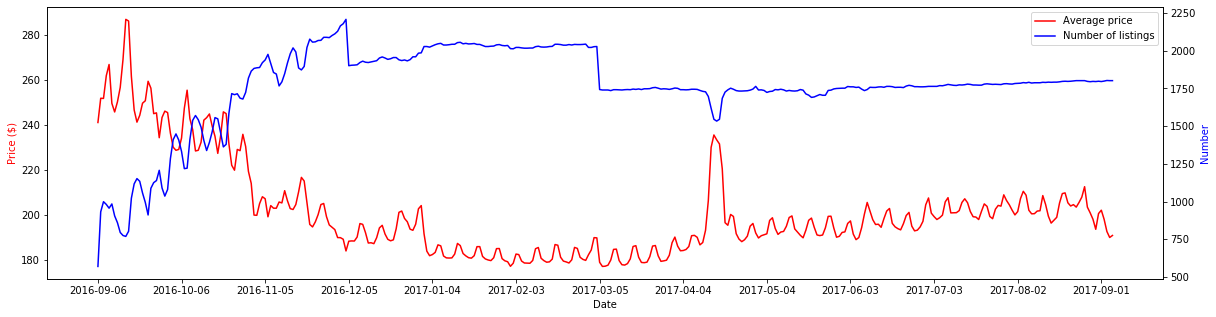

In [24]:
fig=plt.figure(figsize=(20,5))
ax=plt.subplot(111)
ax.set_xlabel('Date')
p1,=ax.plot(df_daily_prices.index,df_daily_prices.values, color='r')
ax.set_ylabel('Price ($)', color='r')
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
p2,=ax2.plot(df_daily_supply.index,df_daily_supply.values, color='b')
ax2.set_ylabel('Number', color='b')
ps=[]
ps.append([p1,p2])
plt.legend(ps[0],['Average price','Number of listings'])
ax.xaxis.set_ticks(np.arange(0,365,30))
plt.show()

# Question - 2

**Question:** Is there any seasonal pattern in the prices?

**Answer:** To see if there is any seasonal pattern I plot the autocorrelation of the time series with different lags. As I have only data for one year, I decided to check up the seasonaly up to 35 days. This way I can see if there is weekly or monthly seasonal pattern in the data. Also, I used only a subset of the data, because at the beginning there is a big downward trend in the prices, and also, there is a peak later. So I cut out the steady part after the peak (it is still more than 3 months, so montly seasonal effect could be detected, if there is any).

Based on the figure below, the most significant seasonal length is 7 days. This supports the fact that most of the people have free time at the weekends, therefor the demand is higher at the weekends which implies that the prices are higher, too. I checked this: below the figure we can see that really the highest prices within a week is on the Fridays and Saturdays.



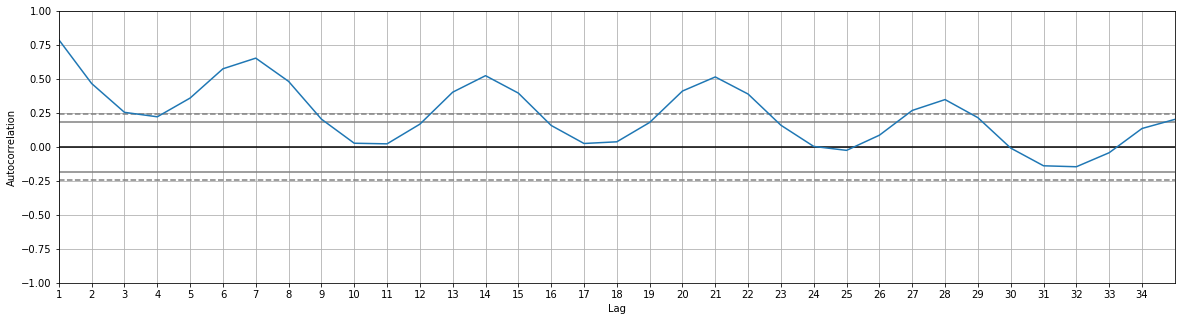

In [25]:
fig=plt.figure(figsize=(20,5))

ax = autocorrelation_plot(df_daily_prices.values[250:])
ax.xaxis.set_ticks(np.arange(1,35));
ax.set_xlim([1,35]);


In [26]:
from datetime import datetime

days={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday', 7:'Monday' }

print("Local Maxima of Price")
for i in range(250, 364):
    if df_daily_prices[i-1]<df_daily_prices[i]>df_daily_prices[i+1]:
        print(df_daily_prices.index[i], days[datetime.strptime(df_daily_prices.index[i],'%Y-%m-%d').weekday()], df_daily_prices[i])

Local Maxima of Price
2017-05-20 Saturday 198.53491124260356
2017-05-27 Saturday 199.36939010356733
2017-06-03 Saturday 197.2755681818182
2017-06-09 Friday 205.48909299655568
2017-06-13 Tuesday 195.8021603183627
2017-06-17 Saturday 202.8020419739081
2017-06-24 Saturday 201.05762711864406
2017-07-01 Saturday 207.48099829835508
2017-07-08 Saturday 207.6081081081081
2017-07-14 Friday 207.10992108229988
2017-07-21 Friday 204.83914510686165
2017-07-26 Wednesday 204.16272522522522
2017-07-28 Friday 208.87191011235956
2017-08-04 Friday 210.44630872483222
2017-08-11 Friday 208.53966480446928
2017-08-19 Saturday 209.73900946021146
2017-08-22 Tuesday 204.514730405781
2017-08-26 Saturday 212.4986118822876
2017-09-01 Friday 202.0467966573816


# Modeling (CRISP-DM Phase-4)


In [27]:
#Adding other important fields which are important for good price prediction
X=pd.concat( [ X,
               pd.get_dummies(df_l['neighbourhood_cleansed']),
               pd.get_dummies(df_l['property_type']),
               pd.get_dummies(df_l['room_type']), 
               df_l['bedrooms'] ], axis=1, sort=False)

X

,"""24-Hour Check-in""","""Air Conditioning""","""Buzzer/Wireless Intercom""","""Cable TV""","""Carbon Monoxide Detector""","""Elevator in Building""","""Family/Kid Friendly""","""Fire Extinguisher""","""First Aid Kit""","""Free Parking on Premises""",...,Guesthouse,House,Loft,Other,Townhouse,Villa,Entire home/apt,Private room,Shared room,bedrooms
0,0,0,0,0,0,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,2.0
1,0,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1.0
2,0,1,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1.0
3,0,1,0,0,1,0,0,1,1,1,...,0,1,0,0,0,0,0,1,0,1.0
4,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,1,1,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,1.0
3581,1,1,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,1,0,1.0
3582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
3583,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0


In [28]:
y=df_l['price']
y

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3572, dtype: float64

In [29]:
rg=DecisionTreeRegressor(random_state=42)
rg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

# Evaluation (CRISP-DM Phase-5)


In [30]:
cols = X.columns
rg.feature_importances_
f=[(i,cols[i],rg.feature_importances_[i]) for i in range(len(cols)) ]
f.sort(key=lambda x: x[2])
f.reverse()
ff=[(i,cols[i],rg.feature_importances_[i]) for i in range(nr_of_amenities) ]
ff.sort(key=lambda x: x[2])
ff.reverse()
f[:20]

[(83, 'Entire home/apt', 0.1902572272315216),
 (0, '"24-Hour Check-in"', 0.14651578942088872),
 (30, 'Cat(s)', 0.08964751038683517),
 (86, 'bedrooms', 0.07134515621378579),
 (55, 'Fenway', 0.04287541256519586),
 (18, '"Pets Allowed"', 0.03407301710366965),
 (34, 'Essentials', 0.02855928639557092),
 (15, '"Lock on Bedroom Door"', 0.02031123771032074),
 (42, 'Shampoo', 0.018506743450573886),
 (1, '"Air Conditioning"', 0.01760609269183596),
 (5, '"Elevator in Building"', 0.01711585276484118),
 (46, 'Back Bay', 0.016681182741945882),
 (48, 'Beacon Hill', 0.015397181654962922),
 (67, 'South End', 0.01496521072115055),
 (21, '"Smoke Detector"', 0.014792045932332243),
 (66, 'South Boston Waterfront', 0.01301895528969299),
 (37, 'Heating', 0.011317811957060058),
 (38, 'Internet', 0.011058915591030383),
 (9, '"Free Parking on Premises"', 0.009896387739599683),
 (2, '"Buzzer/Wireless Intercom"', 0.009281569252604887)]

In [31]:
ff[:20]

[(0, '"24-Hour Check-in"', 0.14651578942088872),
 (30, 'Cat(s)', 0.08964751038683517),
 (18, '"Pets Allowed"', 0.03407301710366965),
 (34, 'Essentials', 0.02855928639557092),
 (15, '"Lock on Bedroom Door"', 0.02031123771032074),
 (42, 'Shampoo', 0.018506743450573886),
 (1, '"Air Conditioning"', 0.01760609269183596),
 (5, '"Elevator in Building"', 0.01711585276484118),
 (21, '"Smoke Detector"', 0.014792045932332243),
 (37, 'Heating', 0.011317811957060058),
 (38, 'Internet', 0.011058915591030383),
 (9, '"Free Parking on Premises"', 0.009896387739599683),
 (2, '"Buzzer/Wireless Intercom"', 0.009281569252604887),
 (13, '"Indoor Fireplace"', 0.00887017734470028),
 (6, '"Family/Kid Friendly"', 0.007400185104977704),
 (14, '"Laptop Friendly Workspace"', 0.007388226644242636),
 (4, '"Carbon Monoxide Detector"', 0.0069502979962913535),
 (40, 'Kitchen', 0.006137016987513115),
 (29, 'Breakfast', 0.006120038398460155),
 (23, '"Suitable for Events"', 0.005999353674899608)]

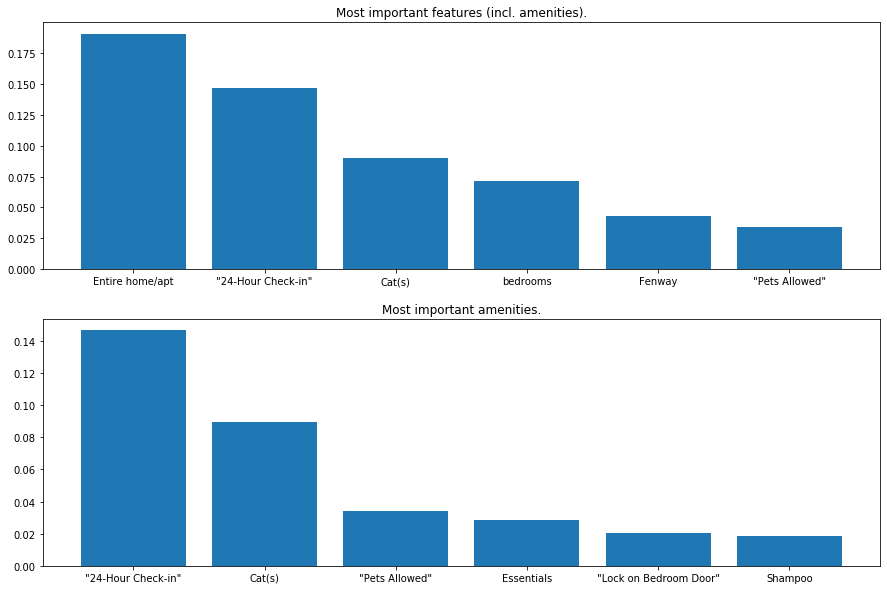

In [32]:
fig=plt.figure(figsize=(15,10))
plt.subplot(211)
plt.title("Most important features (incl. amenities).")
plt.bar([f[i][1] for i in range(6)], [f[i][2] for i in range(6)])

plt.subplot(212)
plt.title("Most important amenities.")
plt.bar([ff[i][1] for i in range(6)], [ff[i][2] for i in range(6)])

plt.show()

# Question - 3

**Question:** What are the most influencing amenity factors of the prices?

**Answer:** For this I trained a DecisionTreeRegressor model. Beside the 'amenity' feature, I used other features as well which I thought can influence the prices. After one-hot-enoding the categorical features I trained the model. The result can be seen above.

The 1st figure above shows the most important features in general. Actually many of them is an amenity feature, but, for example, the most important one is not (it says if the entire home/apartment is offered). Other non-amenity features are the number of 'bedrooms' and one of the neighborhoods ("Fenway").

The 2nd figure above shows the amenity features which influencing the price the most. The most important amenity here is whether there is 24-hour check-in (which is understandable, as the person providing this has to be paid). The 2nd and 3rd amenity are similar: if cats/pets are allowed. For me the following item was a bit surprising: 'Shampoo'. I would not have thought that those small bottle of shampoos are influencing the price significantly. 


# Deployment (CRISP-DM Phase-6)

Not applicable.